# Check `wobble` Results for HD 101501

In [2]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from scipy.io import readsav

import wobble
from tqdm import tqdm
import seaborn as sns

import tensorflow as tf
"""
import exoplanet as xo
import pymc3 as pm
import theano.tensor as tt
import corner
"""

'\nimport exoplanet as xo\nimport pymc3 as pm\nimport theano.tensor as tt\nimport corner\n'

In [3]:
reg_star_file = '../regularization/EXPRES/55cnc_expres_star_K0.hdf5'
reg_t_file    = '../regularization/EXPRES/55cnc_expres_t_K2.hdf5'

date=200907
file_num=1

## RVs

In [4]:
star_name = '101501'
data = wobble.Data(f'../data/{star_name}_expres.hdf5', orders=np.arange(40,80))

In [8]:
results = wobble.Results(filename=f'./Results/{date}_{star_name}_expres_results{file_num}.hdf5')
wt,wr,we = np.loadtxt(f'./Results/{date}_{star_name}_expres_rvs{file_num}.txt',
                      skiprows=3,usecols=[0,1,2],unpack=True)

Results: reading from ./Results/200907_101501_expres_results1.hdf5


<ErrorbarContainer object of 3 artists>

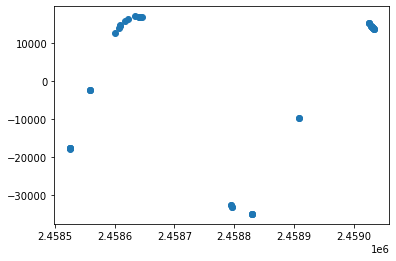

In [9]:
plt.errorbar(wt,wr+data.bervs,yerr=we,marker='o',linestyle='None')
plt.plot(data.dates, data.pipeline_rvs+data.bervs,'.')

## Templates

<ipython-input-17-7acca73f5d21>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6.4*3,4.8))
<ipython-input-17-7acca73f5d21>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6.4*3,4.8))
<ipython-input-17-7acca73f5d21>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize

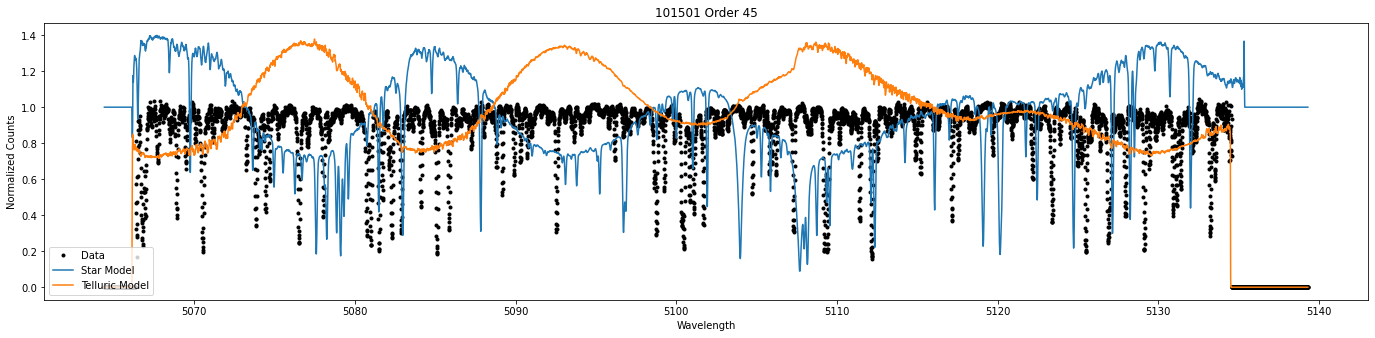

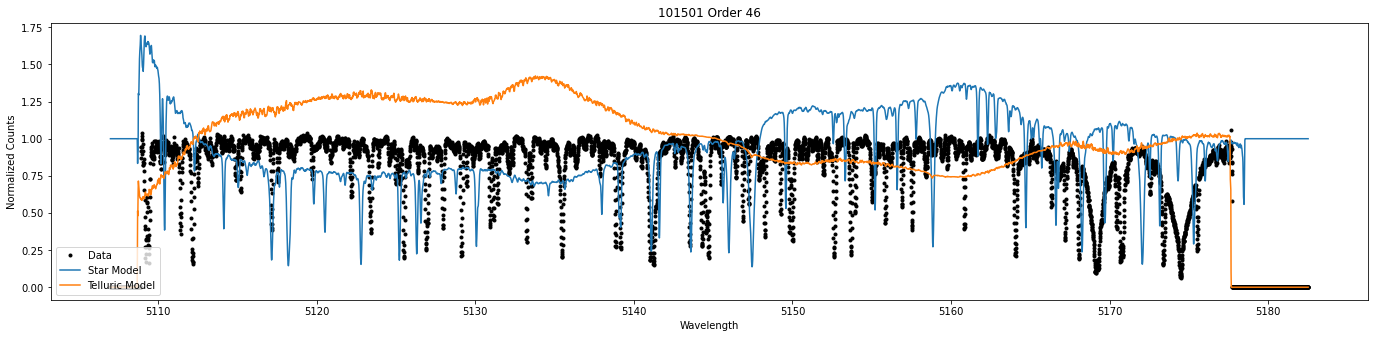

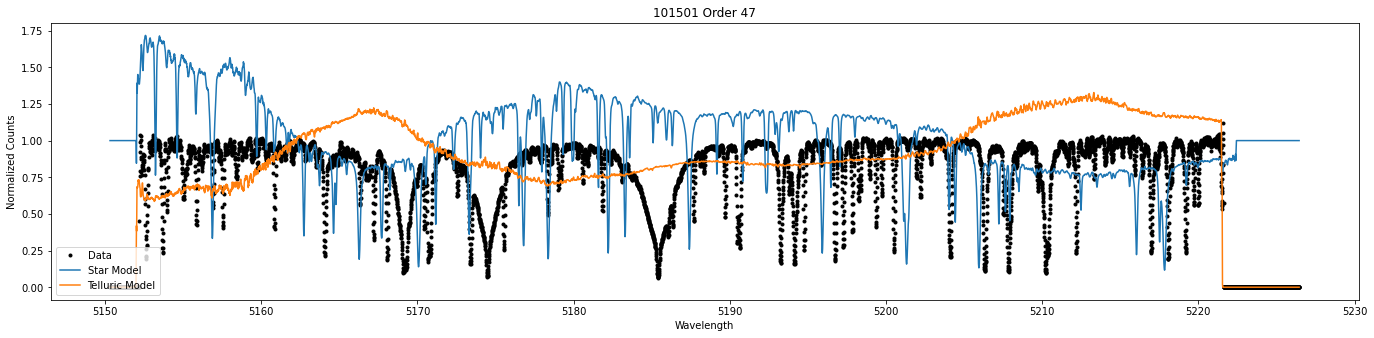

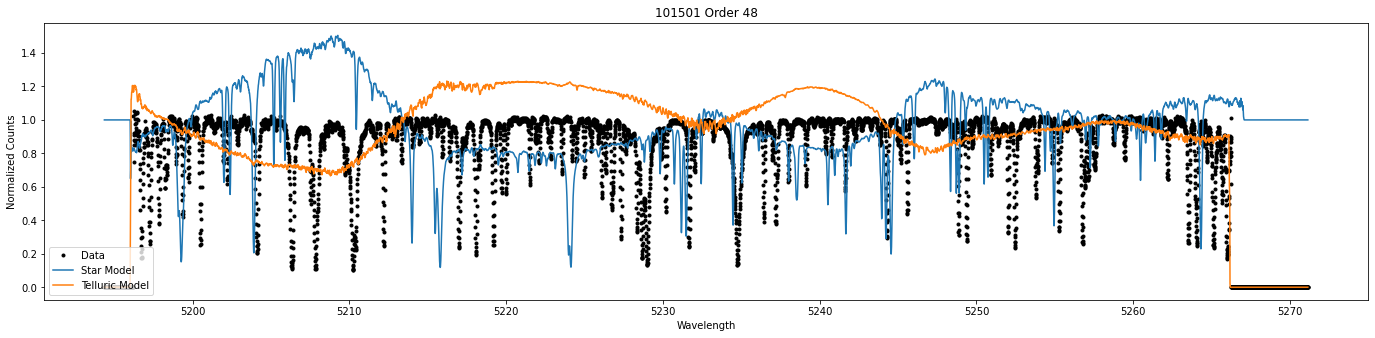

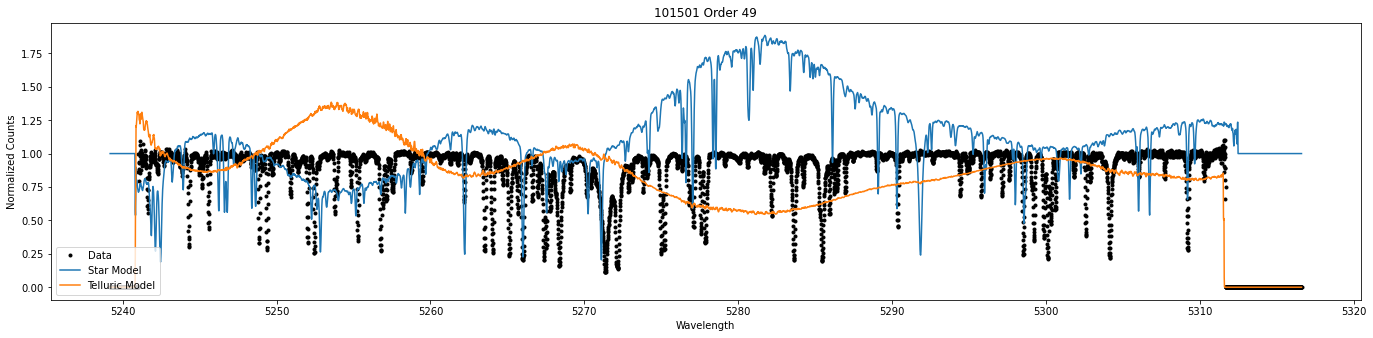

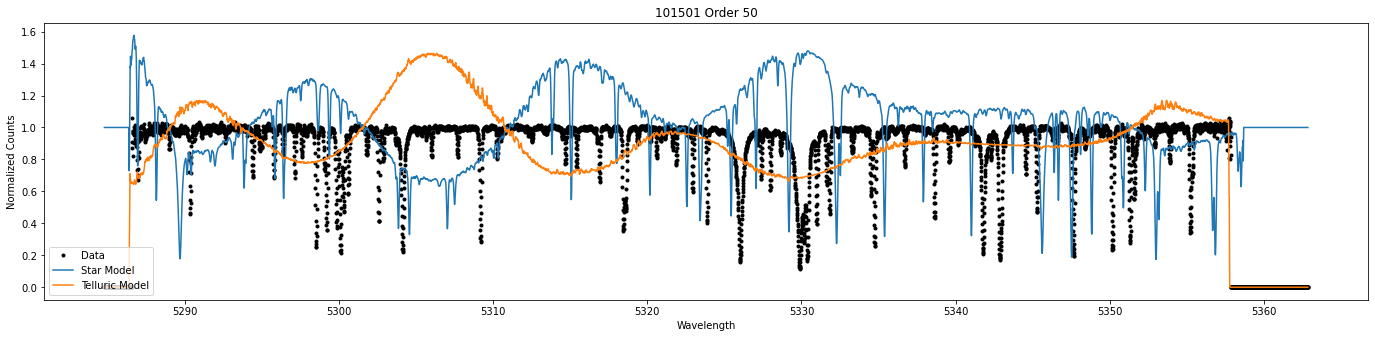

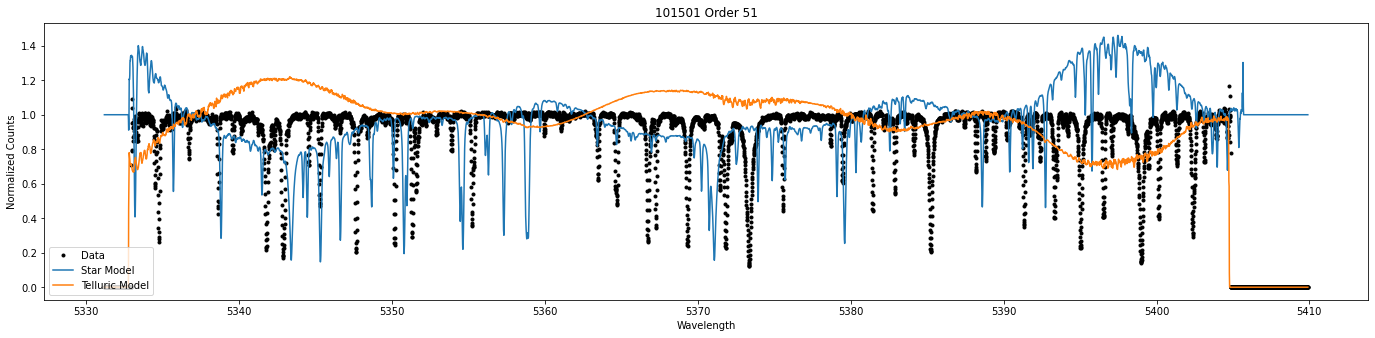

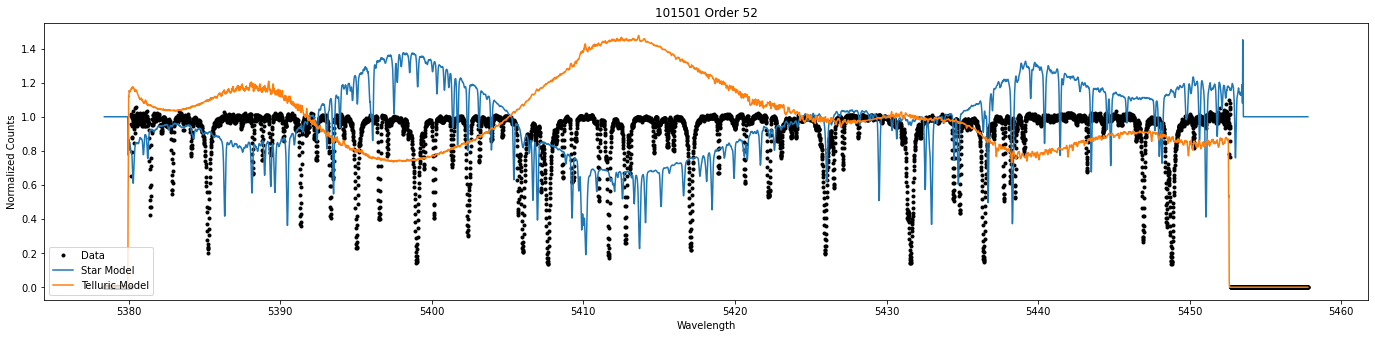

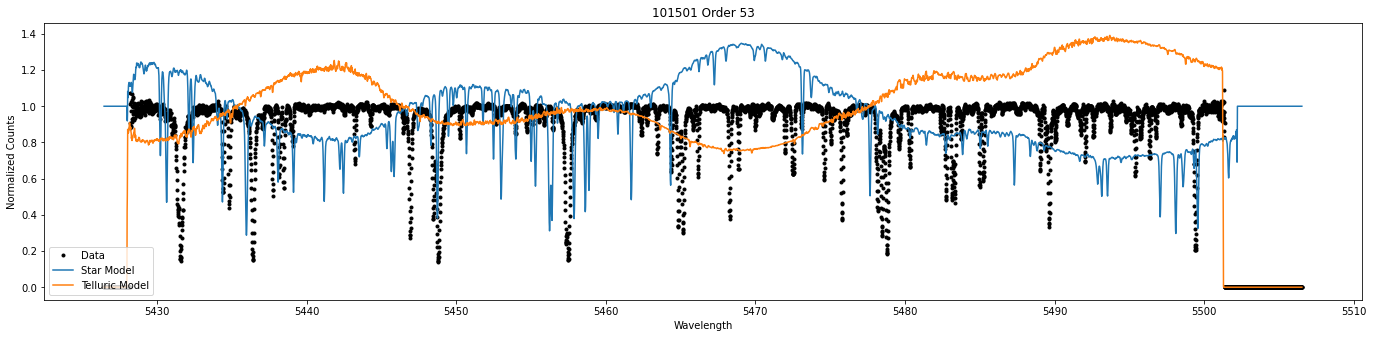

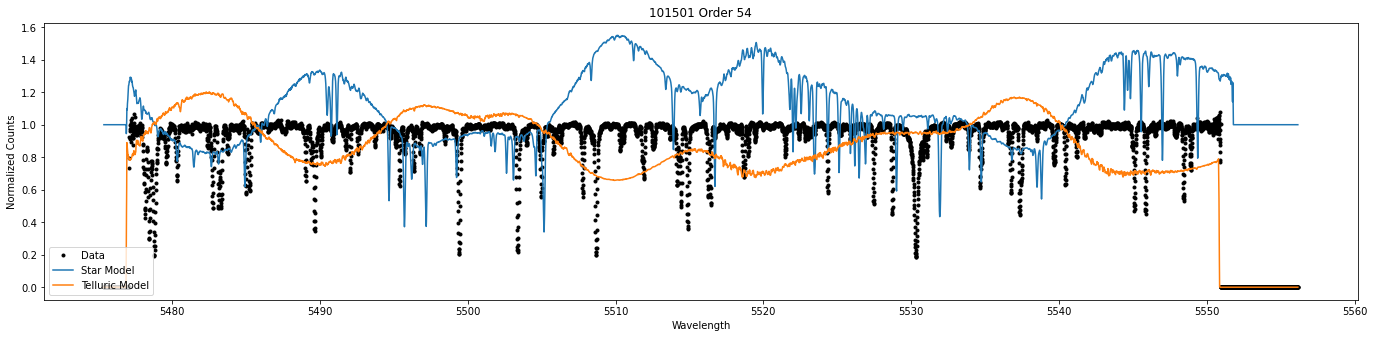

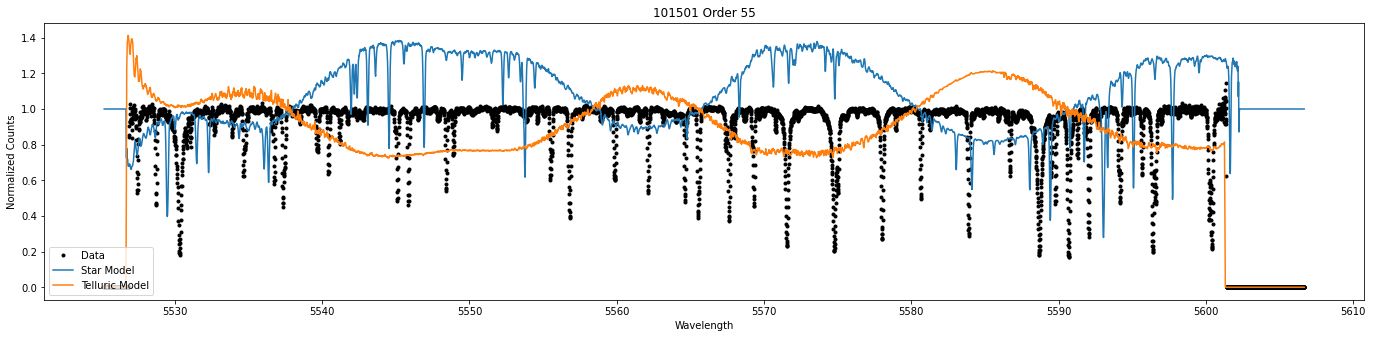

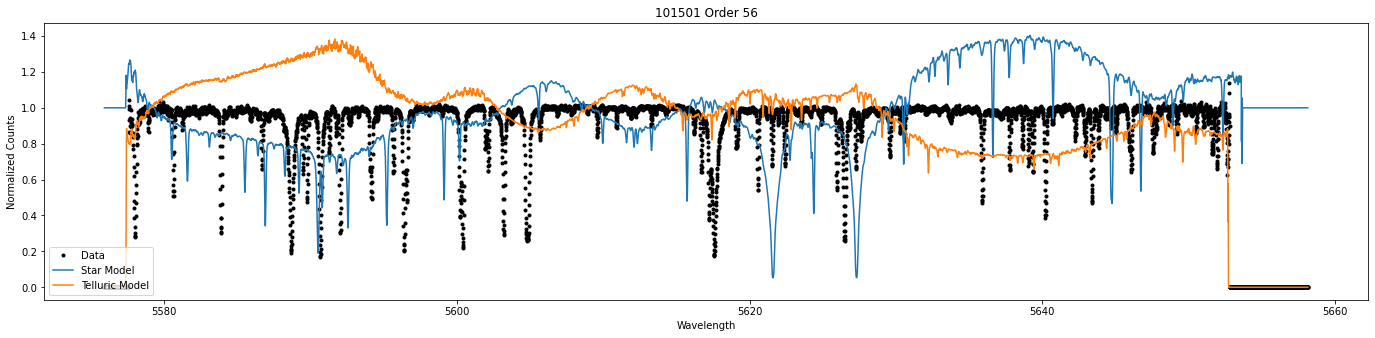

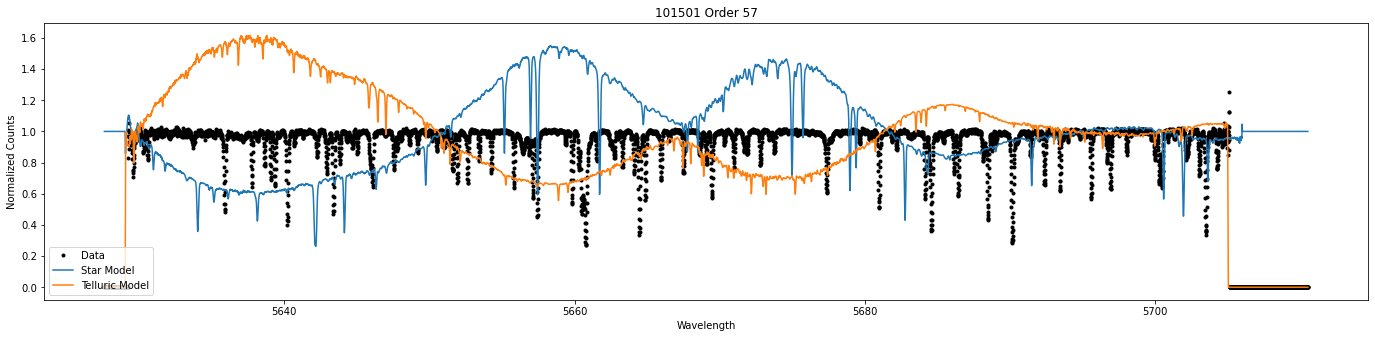

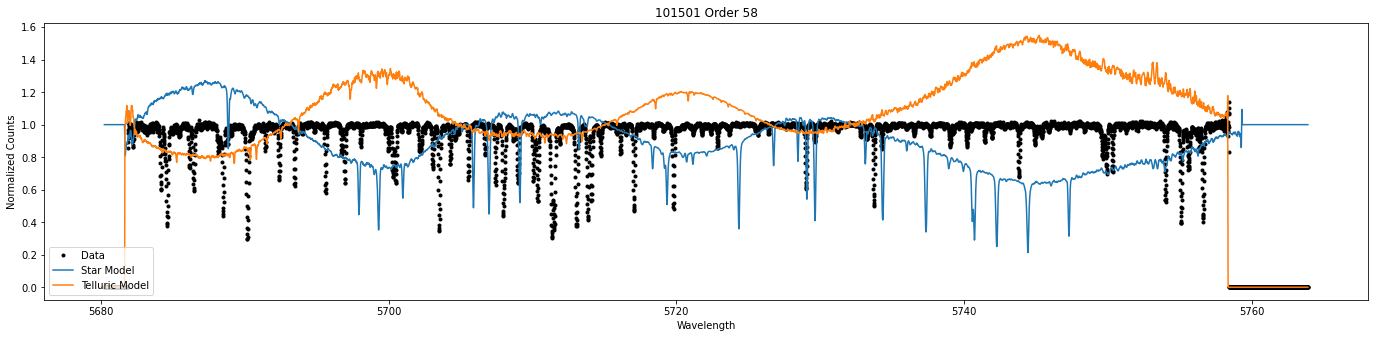

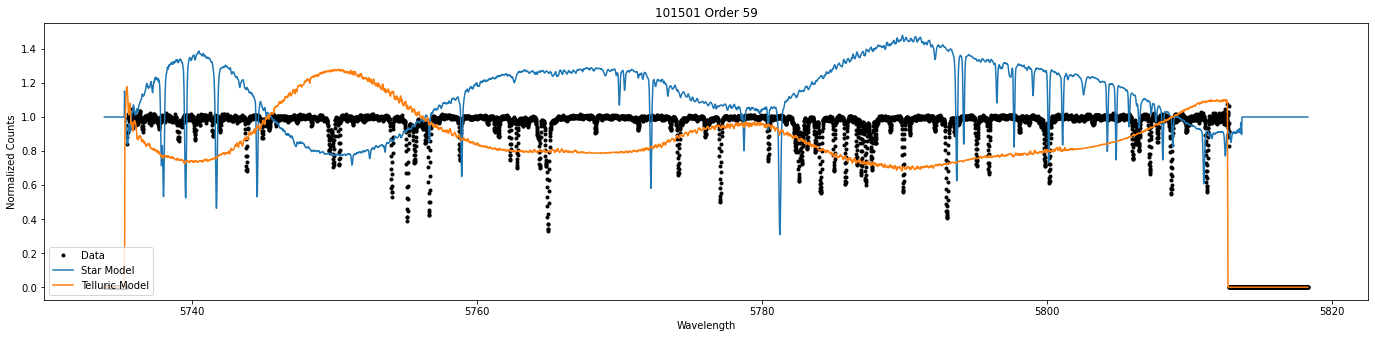

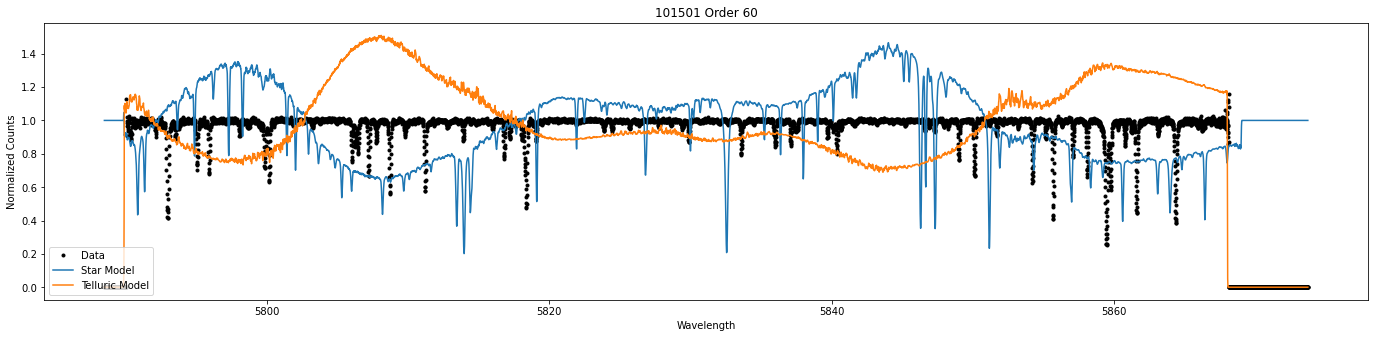

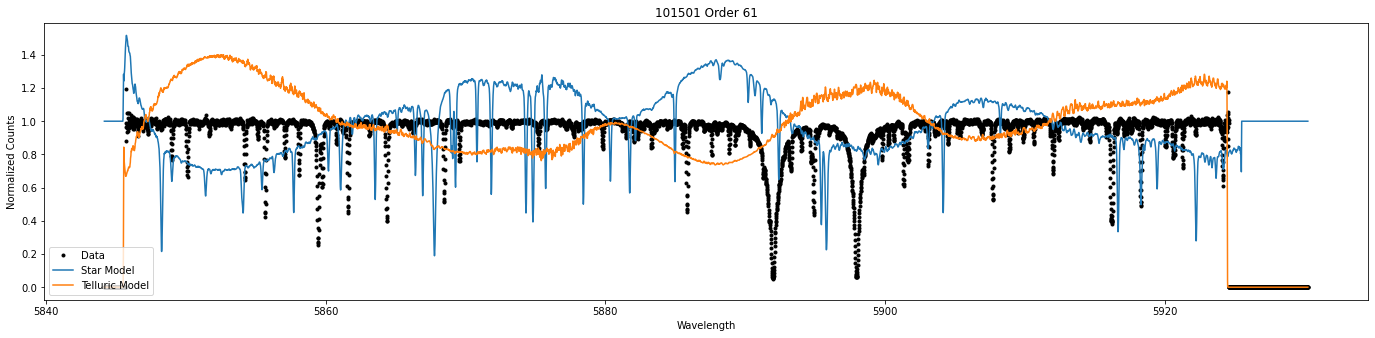

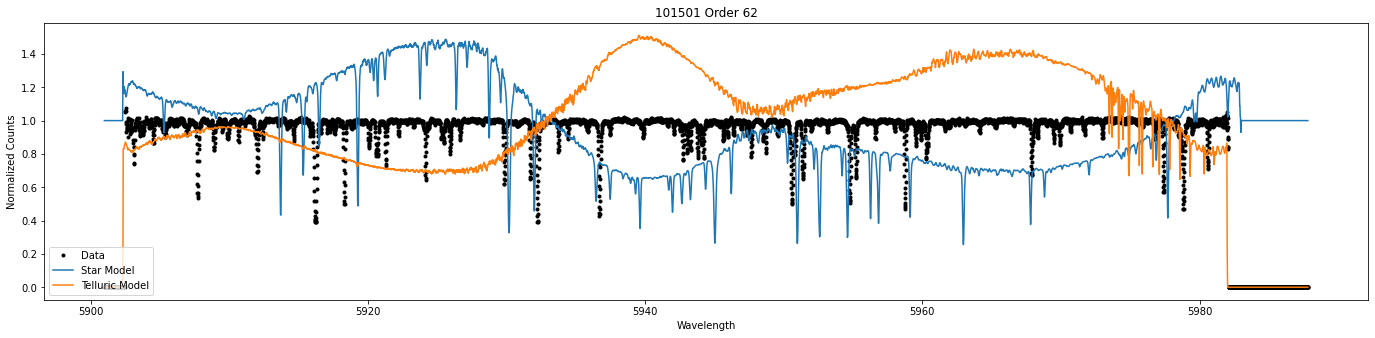

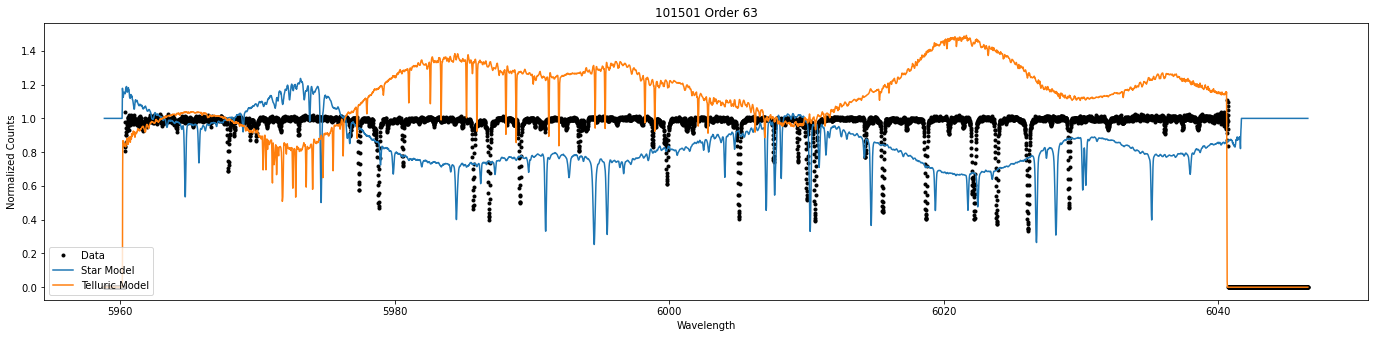

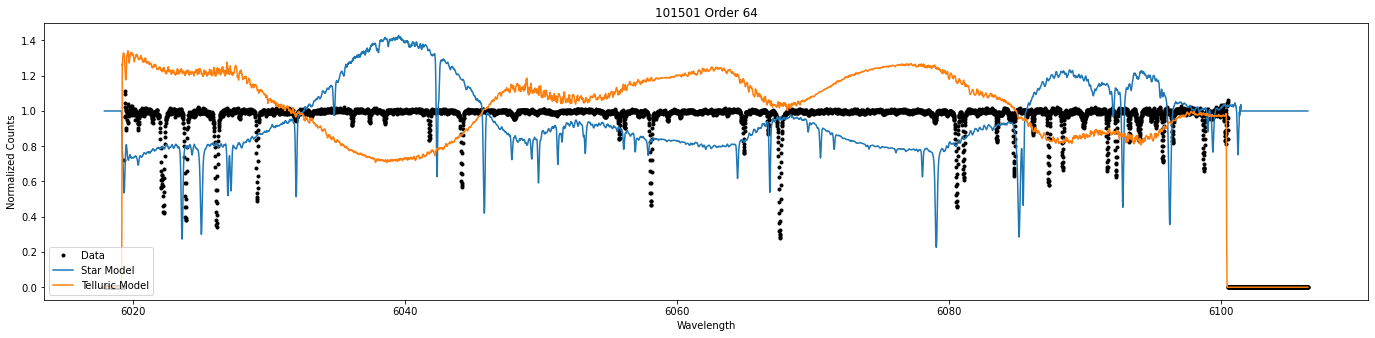

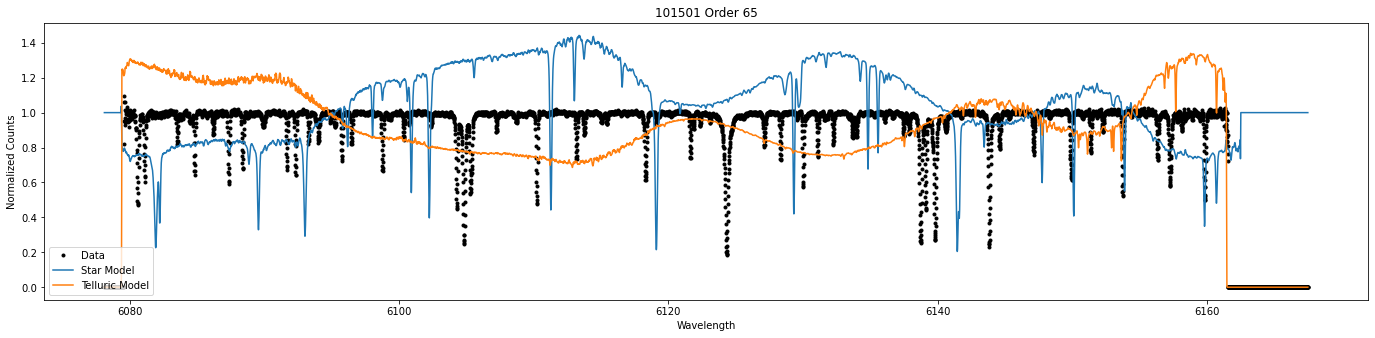

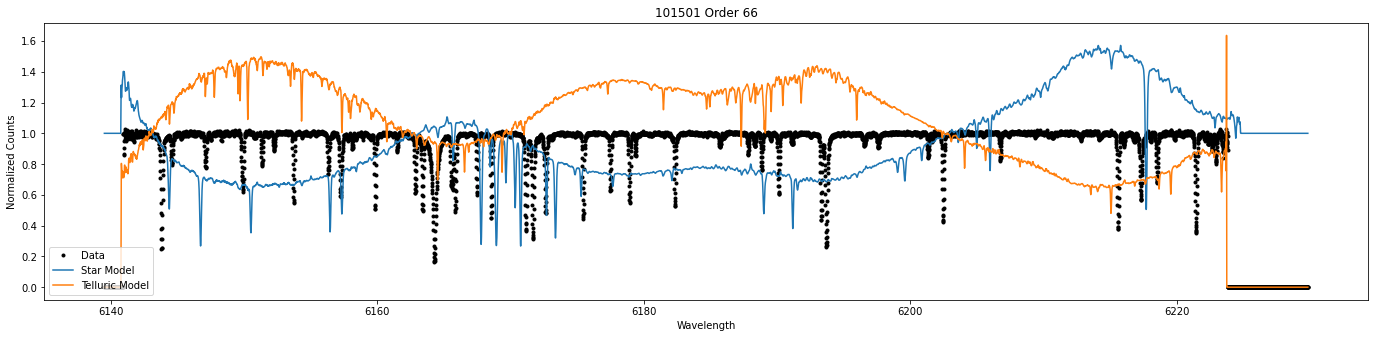

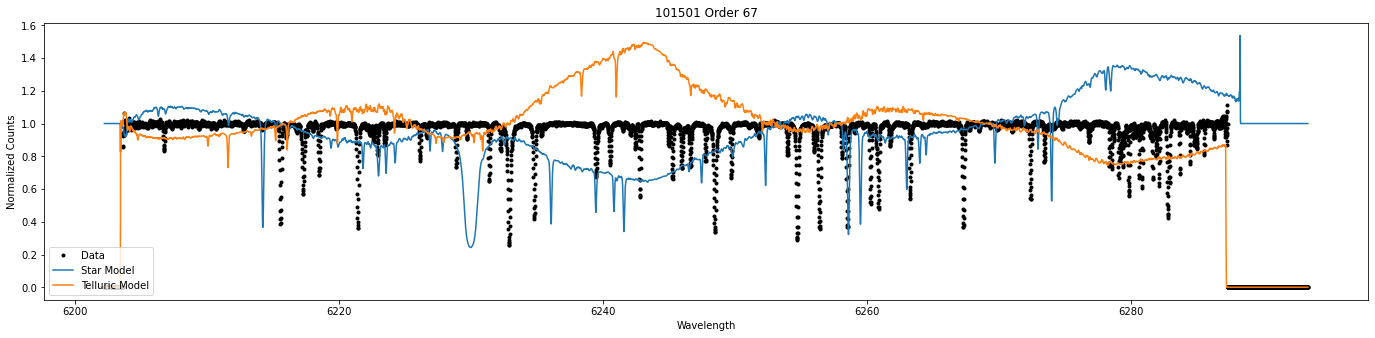

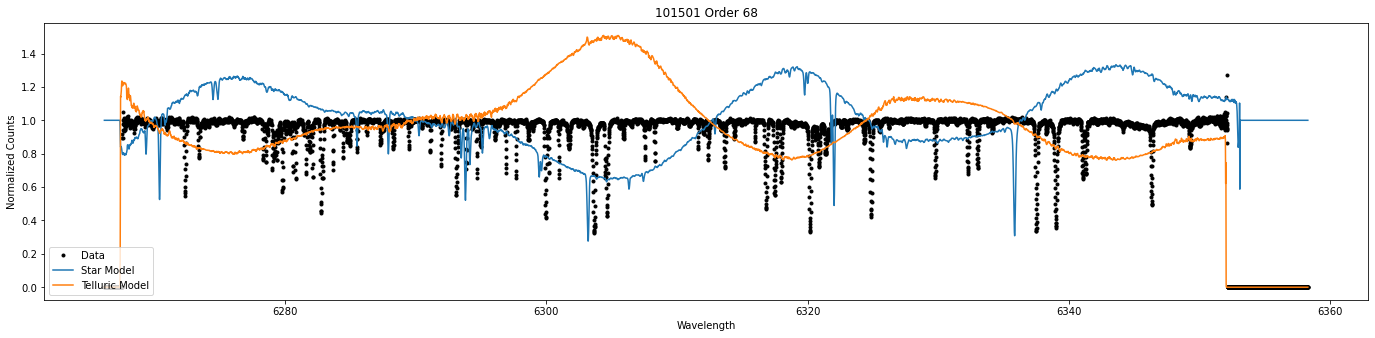

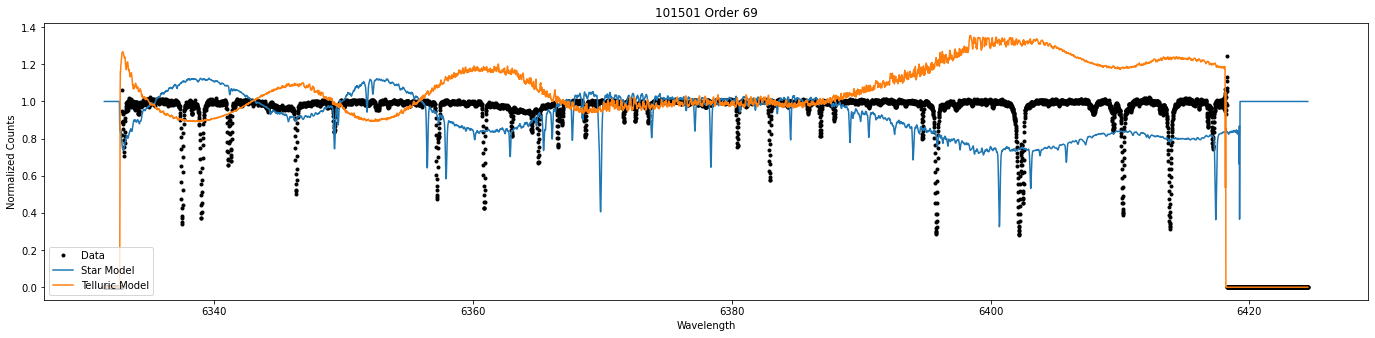

In [17]:
nepc = 12
for nord in range(results.R):
    plt.figure(figsize=(6.4*3,4.8))
    plt.title(f'101501 Order {results.orders[nord]}')
    plt.xlabel('Wavelength')
    plt.ylabel('Normalized Counts')
    
    # Plot Data
    plt.plot(np.exp(data.xs[nord][nepc]),np.exp(data.ys[nord][nepc]),'k.',label='Data')
    
    # Plot Templates
    plt.plot(np.exp(data.xs[nord][nepc]),np.exp(results.star_ys_predicted[nord][nepc]),'-',
             label='Star Model')
    plt.plot(np.exp(data.xs[nord][nepc]),np.exp(results.tellurics_ys_predicted[nord][nepc]),'-',
             label='Telluric Model')
    plt.legend(loc=3)
    plt.tight_layout()
    plt.savefig(f'./Figures/{date}_{star_name}_order{nord}.png')